In [364]:
import gym_bondgraph
import gymnasium as gym
from bond_graph import *
import numpy as np

%reload_ext autoreload
%autoreload 2

Not connected
False


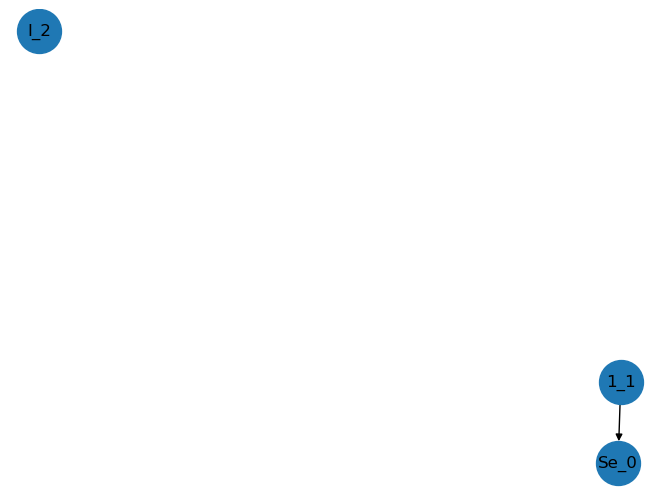

In [365]:
MAX_NODES = 8
MAX_STATES = 6

t_span = [0, 10]
time_array = np.linspace(t_span[0], t_span[1], 200)

s0 = BondGraph(max_nodes=MAX_NODES, max_states=MAX_STATES, time_array=time_array)
s0.add_element(EffortSource())
s0.add_element(OneJunction())
s0.add_bond(1, 0, -1)
s0.add_element(Inertance(1))
# s0.add_bond(2, 1, -1)

print(s0.is_valid_solution(verbose=True))
# print(s0.flow_causal_graph.in_degree(1))

labels = nx.get_node_attributes(s0.flow_causal_graph, 'element_label')
nx.draw(s0.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


In [348]:
default_params = {
    'R': 1,
    'I': 1,
    'C': 1,
}
seed = np.random.randint(1,100)
# seed=420
env = gym.make('gym_bondgraph/BondGraphEnv-v4',  seed=None, seed_graph=s0, max_nodes=MAX_NODES, default_params=default_params)


c:\Users\Daniel\miniconda3\envs\bond-graph\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (8, 8)
  logger.warn(


## Manual Action Adding

In [349]:
env.reset()
# action = env.action_space.sample()
# action = {
#     'node_or_bond': 0, # 0 for add node, 1 for add edge
#     "node_type": BondGraphElementTypes.CAPACITANCE.value,
#     "bond": [1, 0, 0], # 0 for negative bond sign, 1 for positive
#     "node_param": 5
#     }

# observation, reward, terminated, na, info = env.step(action)

# causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

# print("Causal Adjacency Mask: \n", causal_adjacency_mask)
# print()
# print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
# print()

# print("Action: ", action)

# print("Observation: ", observation)
# print("Reward: ", reward)
# print("Terminated: ", terminated)
# print("Info: ", info)

({'node_type_space': array([1, 4, 6, 0, 0, 0, 0, 0]),
  'node_param_space': array([0., 0., 1., 0., 0., 0., 0., 0.]),
  'adjacency_matrix_space': array([[0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)},
 {'num_nodes': 3, 'valid solution': False})

In [367]:
obs = env.observation_space.sample()
print(type(obs['node_param_space']))
print(obs)

obs2, info = env.reset()
# print(obs)
print(obs2)


<class 'numpy.ndarray'>
OrderedDict([('adjacency_matrix_space', array([[0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 1]])), ('node_param_space', array([1, 9, 0, 3, 3, 9, 6, 2], dtype=int64)), ('node_type_space', array([0, 7, 4, 2, 2, 1, 5, 1], dtype=int64))])
OrderedDict([('node_type_space', array([1, 4, 6, 0, 0, 0, 0, 0])), ('node_param_space', array([0., 0., 1., 0., 0., 0., 0., 0.])), ('adjaceny_matrix_space', array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64))])


## Random action sampling

In [345]:

env.reset()
num_invalid_systems = 0
num_valid_systems = 0
valid_systems = []

length_of_episodes = []
episode_length = 0

best_system = env.bond_graph
best_reward = 0

highest_reward_per_episode = []

max_episodes = 1000


for i in range(50000):
    action = env.action_space.sample()
    # print("Action: ", action)
    episode_length+=1
    observation, reward, terminated, _, info = env.step(action)
    if env.bond_graph.is_valid_solution():
        num_valid_systems+=1
        
        if(reward>0):
            print("Reward: ", reward)
            if reward > best_reward:
                best_reward = reward
                best_system = env.bond_graph
            valid_systems.append(env.bond_graph)
    else:
        num_invalid_systems+=1
    
    if terminated or episode_length==max_episodes:
        length_of_episodes.append(episode_length)
        episode_length = 0
        env.reset()
    # print("Observation: ", observation)
    
    max_episodes -= 0.01


    # print("Terminated: ", terminated)
    # print("Node Addition Mask: ", env.bond_graph.get_element_addition_mask())
    # print("---------------------------------")
print("Valid Systems: ", num_valid_systems)
print("Invalid Systems: ", num_invalid_systems)
    


Reward:  134.4137273676934


c:\Users\Daniel\Documents\Python Projects\AiPEX-Projects\bond-graph-RL\bond_graph.py:540: RuntimeWarning: divide by zero encountered in log10
  except np.linalg.LinAlgError:


Reward:  inf
Reward:  125.96790943907133
Reward:  165.58932825621153
Reward:  184.28929943684614
Reward:  125.96790943907133
Reward:  156.07099124846948
Reward:  inf
Reward:  inf
Reward:  inf
Reward:  inf
Reward:  inf
Reward:  165.8018380066738
Reward:  134.40800246704566
Singular value matrix detected. Cannot solve.
Singular value matrix detected. Cannot solve.
Singular value matrix detected. Cannot solve.
Reward:  156.07099124846948
Reward:  156.07099124846948
Singular value matrix detected. Cannot solve.
Singular value matrix detected. Cannot solve.
Reward:  134.8642888708135
Singular value matrix detected. Cannot solve.
Reward:  125.96790943907133
Reward:  163.50984617923785
Reward:  133.4066770517317
Reward:  103.30360396919366
Singular value matrix detected. Cannot solve.
Reward:  103.30360396919366
Singular value matrix detected. Cannot solve.
Singular value matrix detected. Cannot solve.
Singular value matrix detected. Cannot solve.
Reward:  135.8428248419484
Reward:  159.51413

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

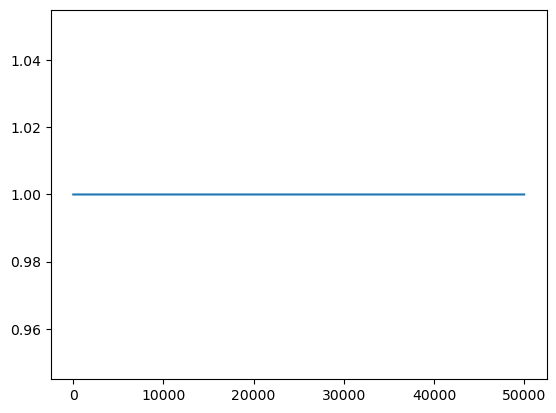

In [342]:
import matplotlib.pyplot as plt
print(length_of_episodes)
plt.plot(length_of_episodes)

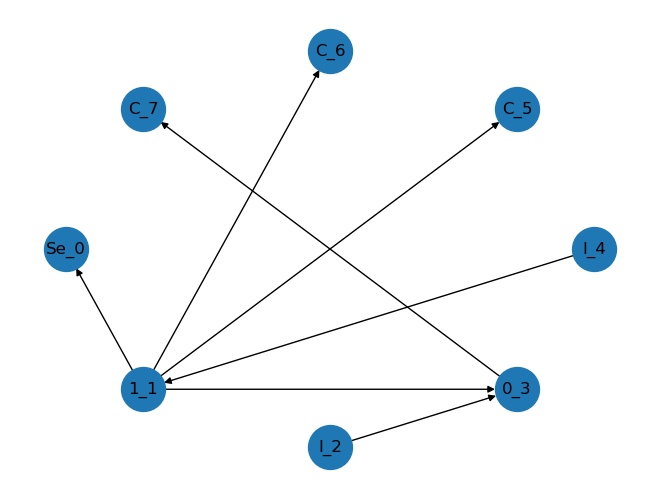

In [321]:
i = 0
labels = nx.get_node_attributes(valid_systems[i].flow_causal_graph, 'element_label')
nx.draw_shell(valid_systems[i].flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

1
178.90404616952833
0.7890404616952834
[ 0.  0.  1.  0.  1.  4. 10.  7.]


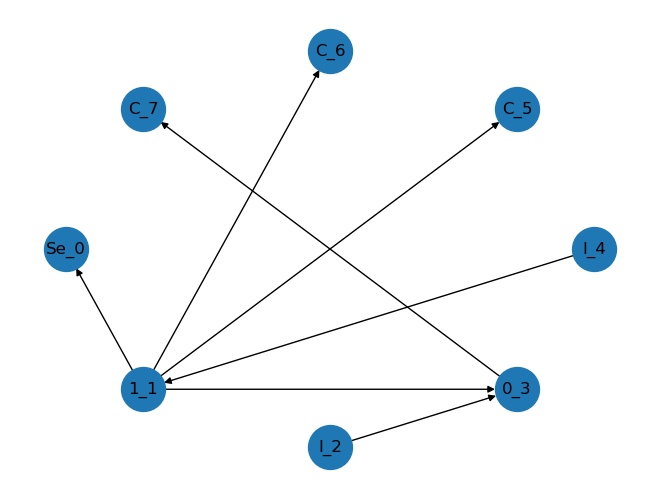

In [323]:

print(len(valid_systems))
print(best_reward)

# print(best_system.reward())

print(best_system.get_parameters())
# i = 0
# labels = nx.get_node_attributes(valid_systems[i].flow_causal_graph, 'element_label')
# nx.draw_shell(valid_systems[i].flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

labels = nx.get_node_attributes(best_system.flow_causal_graph, 'element_label')
nx.draw_shell(best_system.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


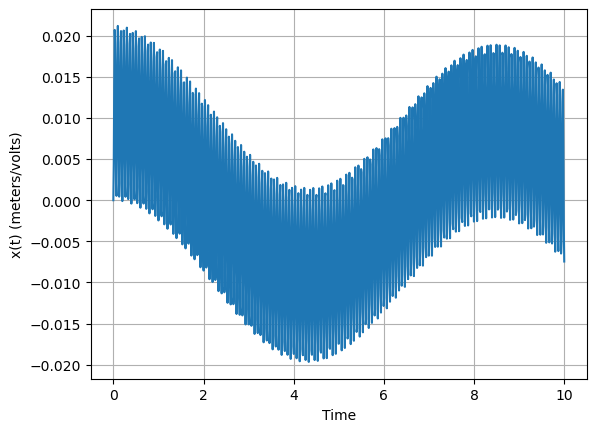

In [333]:
from scipy import *
import time
import matplotlib.pyplot as plt
t_span = [0, 10]
t = np.linspace(t_span[0], t_span[1], 1000)

x0 = x0 = np.zeros(len(best_system.get_energy_storage_elements())) # Initial conditions

# Generate a forcing input at 5 hertz
omega = 2*np.pi*15 
u = lambda t: [np.sin(omega*t)]

y = integrate.odeint(best_system.dynamics, x0, t, args=(u,))

(ts, num_states) = shape(y)

plt.plot(t, y[:, 1], label='x1(t)')
# plt.plot(t, y[:, 2], label='x2(t)')
plt.xlabel('Time')
plt.ylabel('x(t) (meters/volts)')
plt.grid()
# plt.legend()
plt.show()